# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semana 3 - Septiembre 2024

**Rotación de Personal - IBM**

#### **Nombre y matrícula: Alexys Martín Coate Reyes    A01746998**

#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [167]:
# Incluye aquí todas las librerías que consideres necesarias:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
!pip install category_encoders
from category_encoders.binary import BinaryEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PowerTransformer

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import classification_report


# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++


El "Employee Attrition Problem" es cuando los empleados abandoan la empresa, ya sea por razones personales, de ambiente laboral, falta de oportunidades de crecimiento, falta de retos, falta de satisfacción laboral, bajos salarios, falta de capacitación, entre otros.

Esto genera una gran problemática en las empresas, ya que es bastante costoso el reclutar personas y entrenarlas, a comparación de conservar el talento dentro de la organización. Por ello, se busca reducir esta fuga de talentos, ya que representa un gran gasto de tiempo y dinero.

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 2:**

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

In [168]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++

df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")



# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T


Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**

++++++++ Inicia la sección de agregar texto: ++++++++++++


El argumento "all" va a hacer un resumen tanto de las variables categóricas como numéricas del dataframe. Es por ello que algunos campos aparecen con "NaN", ya que dichos campos no pueden calcular para ese tipo de variables.

En caso de no colocar nada en el include, entonces se inferirá que se están pidiendo únicamnete las estadísticas descriptivas de los valores numéricos.

Aquí está en enlace a la documentación oficial: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)   Over18**: Con la siguiente infromación podemos darnos cuenta de que todos los valores para esa columna son iguales, siendo "Y" apareciendo 1470 veces, por lo que indica que todas las personas que trabajan ahí, son mayores de 18 años.

Over18	1470	1	Y	1470	NaN	NaN	NaN	NaN	NaN	NaN	NaN


**b)	EmployeeCount**: Ocurre lo mismo que en "Over18" únicamente que en este apartado la variable es numérica, siendo el número 1 el que rellena toda la tabla. Puesto que tenemos 1470 registros con una media de 1.

EmployeeCount	1470.0	NaN	NaN	NaN	1.0	0.0	1.0	1.0	1.0	1.0	1.0

**c)	StandardHours**: Ocurre lo mismo que con "EmployeeCount" sólo que el número que llena la tabla es el 80. Esto significa que las horas de trabajo estandar para todos son de 80 horas, seguramente a la quincena, ya que 80/10 (10 días laborales en 2 semanas) da un total de 8 horas diaias.

StandardHours	1470.0	NaN	NaN	NaN	80.0	0.0	80.0	80.0	80.0	80.0	80.0


**d)	EmployeeNumber**: El número de empleado no afecta si el empleado se quedará o no. Únicamente sirve para llevar una estadística, de quien es más problable que deje la empresa con base en los datos recabados. En este ejemplo podemos ver que los números de empleado van desde el 1 hasta el 2068, por lo que no están seguidos.

EmployeeNumber	1470.0	NaN	NaN	NaN	1024.865306	602.024335	1.0	491.25	1020.5	1555.75	2068.0
++++++++ Termina la sección de agregar texto. +++++++++++




In [169]:
# Eliminamos los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


# **Ejercicio 5:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

#### **NOTA: Utiliza semillas en cada función de partición, para permitir la repetibilidad de tu modelo y poder evaluarlo de mejor majera.**

In [170]:
# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++

# Separar características (X) y variable objetivo (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Realizando partición de los datos
Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y, test_size=0.15, train_size=0.7, random_state=1, stratify=y)
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.15, train_size=0.15, random_state=1, stratify=ytemp)


print("Xtrain shape: ",Xtrain.shape)
print("ytrain shape: ",ytrain.shape)
print("Xval shape: ",Xval.shape)
print("yval shape: ",yval.shape)
print("Xtest shape: ",Xtest.shape)
print("ytest shape: ",ytest.shape)



# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++

Xtrain shape:  (1029, 30)
ytrain shape:  (1029,)
Xval shape:  (33, 30)
yval shape:  (33,)
Xtest shape:  (34, 30)
ytest shape:  (34,)


# **Ejercicio 6:**


**Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las nuevas variables deberán llamarse ahora: ytrainT, yvalT, ytestT. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

In [171]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


le = LabelEncoder()

# Aplicando label enconder a la variable de attrition
ytrainT = pd.DataFrame(le.fit_transform(ytrain), columns=['Attrition_encoded'])
yvalT = pd.DataFrame(le.transform(yval), columns=['Attrition_encoded'])
ytestT = pd.DataFrame(le.transform(ytest), columns=['Attrition_encoded'])


# Calculate and display the proportion of data in each level
print("Porcentaje de datos en cada clase para ytrainT:")
print(ytrainT['Attrition_encoded'].value_counts() / ytrainT.shape[0])
print("\nPorcentaje de datos en cada clase para yvalT:")
print(yvalT['Attrition_encoded'].value_counts() / yvalT.shape[0])
print("\nPorcentaje de datos en cada clase para ytestT:")
print(ytestT['Attrition_encoded'].value_counts() / ytestT.shape[0])

# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

#print(ytrainT['Porcentaje de datos en cada clase de entrenamiento - Attrition:'].value_counts() / ytrainT.shape[0])

Porcentaje de datos en cada clase para ytrainT:
Attrition_encoded
0    0.838678
1    0.161322
Name: count, dtype: float64

Porcentaje de datos en cada clase para yvalT:
Attrition_encoded
0    0.848485
1    0.151515
Name: count, dtype: float64

Porcentaje de datos en cada clase para ytestT:
Attrition_encoded
0    0.823529
1    0.176471
Name: count, dtype: float64


# Respuesta
**De acuerdo con las proporciones anteriores, se puede concluir que existe una gran variación ya que la proporción de los datos debería de ser 50/50 entre todos los datasets.**

# **Ejercicio 7:**


#### **Incluye a continuación el análisis gáfico y describtivo que consideres adecuado. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**

In [172]:
num_cols = ["NumCompaniesWorked","TrainingTimesLastYear", "Age",  "DailyRate",  "DistanceFromHome",  "HourlyRate",  "MonthlyIncome",  "MonthlyRate", "PercentSalaryHike",  "TotalWorkingYears",  "YearsAtCompany",  "YearsInCurrentRole", "YearsSinceLastPromotion",  "YearsWithCurrManager" ]
display(X[num_cols].describe())

,NumCompaniesWorked,TrainingTimesLastYear,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.693197,2.799320,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,15.209524,11.279592,7.008163,4.229252,2.187755,4.123129
std,2.498009,1.289271,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,3.659938,7.780782,6.126525,3.623137,3.222430,3.568136
min,0.000000,0.000000,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,12.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,2.000000,3.000000,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,14.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,4.000000,3.000000,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,18.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,9.000000,6.000000,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,25.000000,40.000000,40.000000,18.000000,15.000000,17.000000


In [173]:
ord_cols = ["Education" ,  "EnvironmentSatisfaction" ,  "JobInvolvement" ,  "JobLevel" ,  "JobSatisfaction" ,  "PerformanceRating" ,  "RelationshipSatisfaction" ,  "StockOptionLevel",  "WorkLifeBalance" ]
display(X[ord_cols].describe())

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.912925,2.721769,2.729932,2.063946,2.728571,3.153741,2.712245,0.793878,2.761224
std,1.024165,1.093082,0.711561,1.106940,1.102846,0.360824,1.081209,0.852077,0.706476
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,1.000000,3.000000
max,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000


In [174]:
bin_cols = ["Gender",  "OverTime"]
display(X[bin_cols].describe())

,Gender,OverTime
count,1470,1470
unique,2,2
top,Male,No
freq,882,1054


In [175]:
cat_cols = ["BusinessTravel",  "Department" ,  "EducationField",  "JobRole",  "MaritalStatus"]
display(X[cat_cols].describe())

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
count,1470,1470,1470,1470,1470
unique,3,3,6,9,3
top,Travel_Rarely,Research & Development,Life Sciences,Sales Executive,Married
freq,1043,961,606,326,673


Observaciones


*   Se puede obsrevar que todos los registros tienen información, por lo que no es necesario aplicar un descarte de la infromación.

* A las variables categòricas y binarias, se les puede aplicar algún método como one-hot encoder

* A las variables numéricas seguramente se les tendrà que aplicar un escalamiento para que los rangos de estas impacten de la misma manera.



# Generando un mapa de calor de las variables numéricas

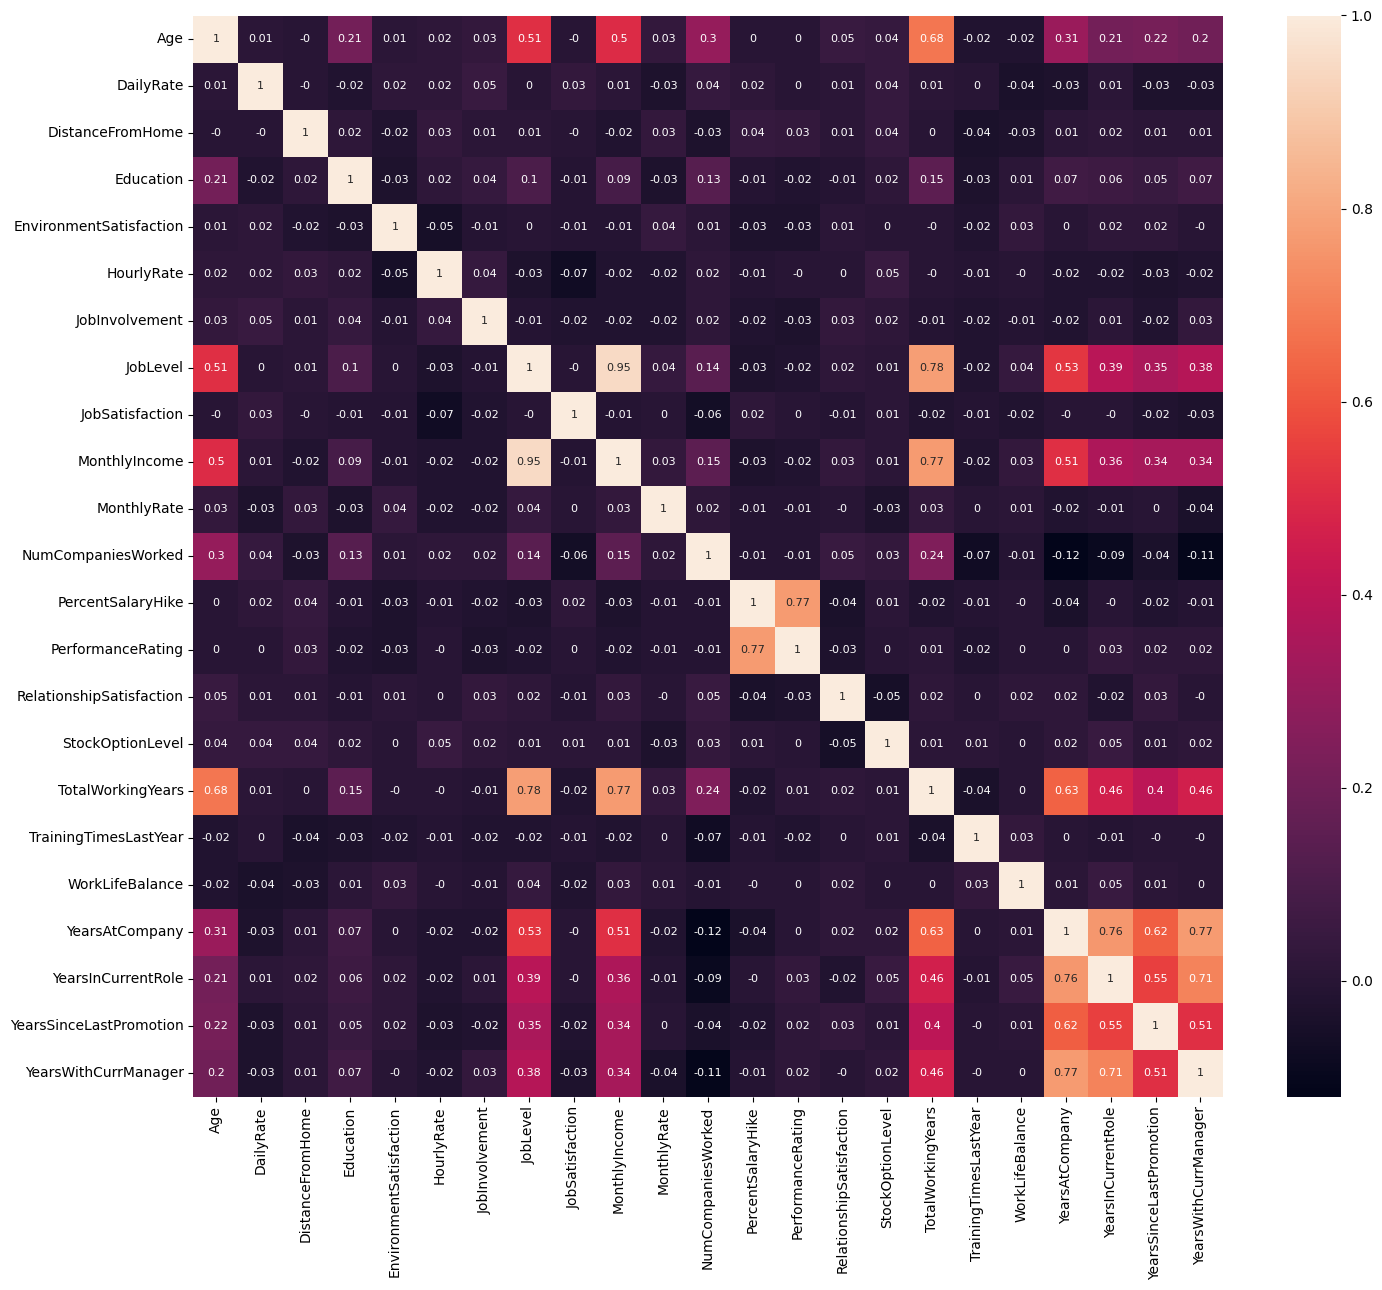

In [176]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
# Incluye en esta sección todas las celdas que consideres conveniente.

# Realizando la visualización de un mapa de calor para ver la correlación de las variables
fig = plt.figure(figsize=(15, 13))
corr_map = round(X.corr(numeric_only=True), 2)
mapa_de_calor = sns.heatmap(corr_map, annot=True, annot_kws={"fontsize": 8})
fig.tight_layout()



# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# Realizando Histograma de los datos numéricos

Número de variables numéricas: 14


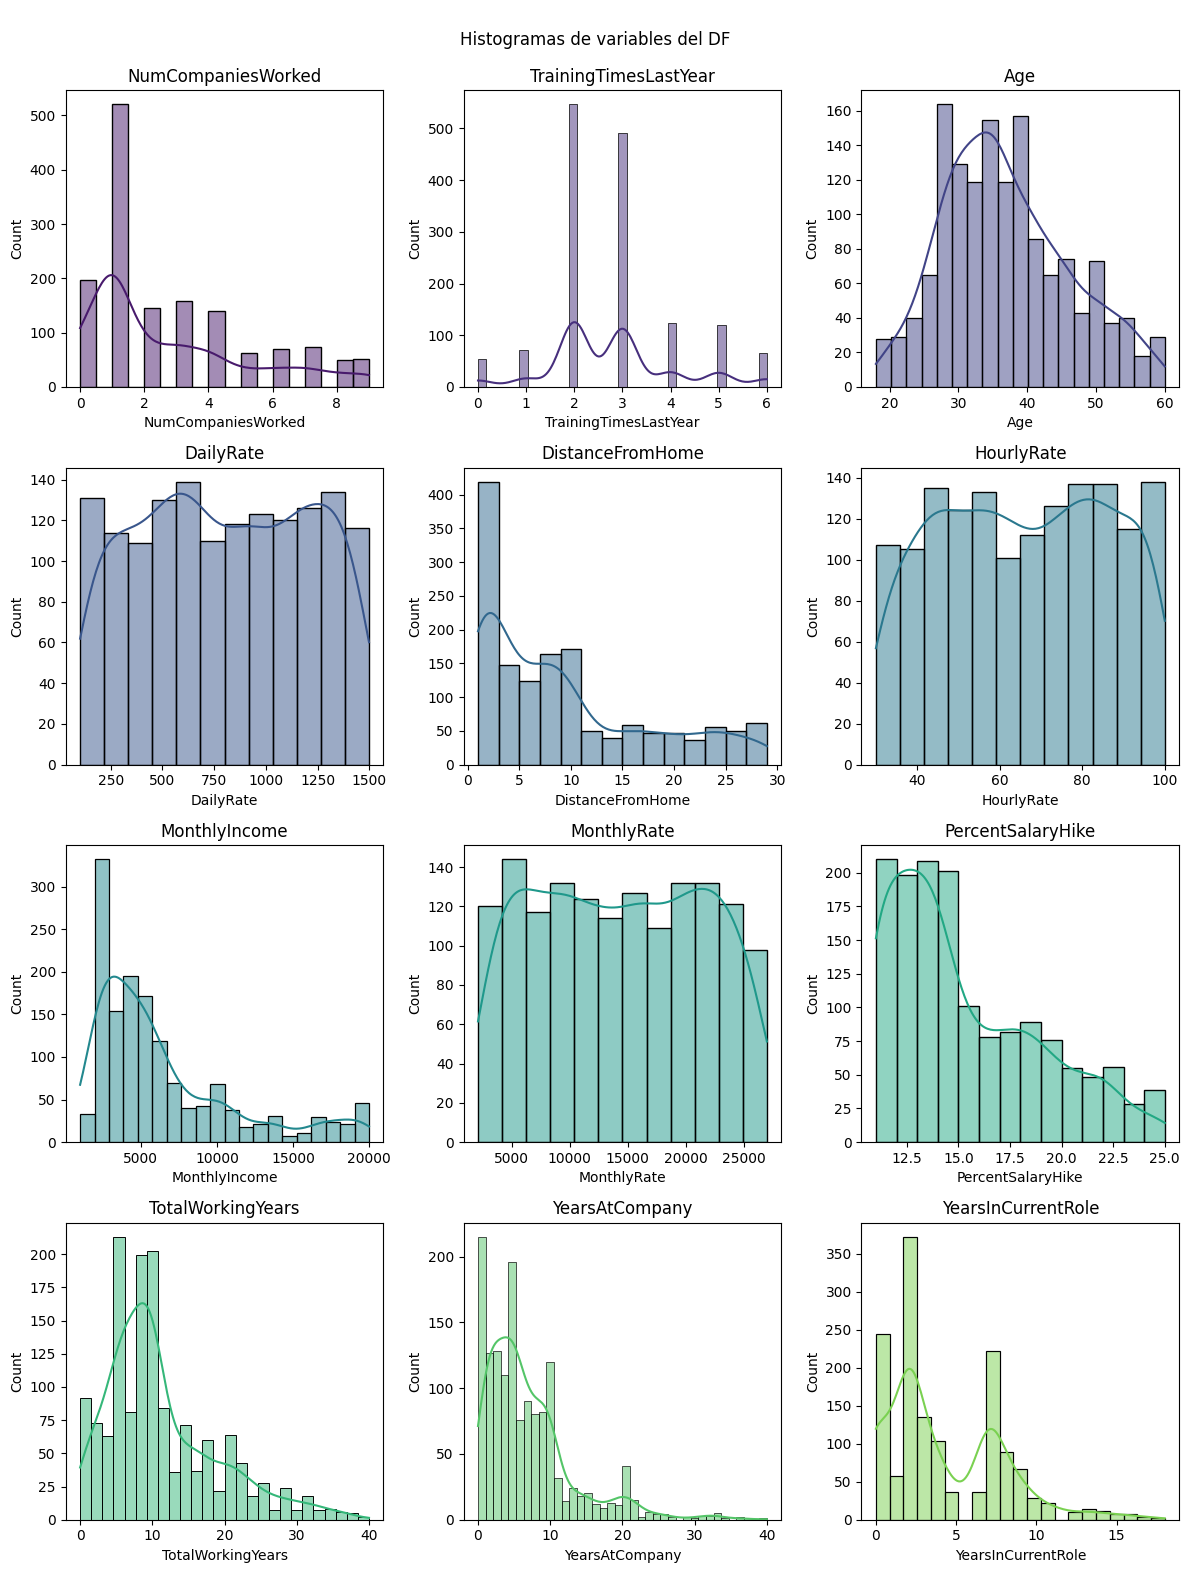

In [177]:
from scipy.stats import skew


skew_dic = dict()

# Imprimiendo cuántos datos numéricos son
print("Número de variables numéricas:", len(num_cols))

# Graficando histogramas
fig, axes = plt.subplots(4,3, figsize=(12,16))
axes = axes.ravel()
colors = sns.color_palette("viridis", len(num_cols))

# Graficando histogramas por cada variable del data frame
for col, ax, color in zip(num_cols, axes, colors):

    # Realiza el histograma y coloca el título del gráfico
    ax = sns.histplot(data=X, x=col, ax=ax, color=color, kde=True)
    ax.set_title(f'{col}')

    # Guarda el skew del histograma en el diccionario
    skew_dic[col] = float(round(skew(X[col]), 4))

fig.suptitle("\nHistogramas de variables del DF\n")
fig.tight_layout()

Observaciones


*   Algunas de las distribuciones no son normales, por lo que vale la pena aplicar una transformación "yeo-johnson" para normalizar los histogramas


# Graficando boxpots para variables numéricas

Columnas a escalar (scale_cols):
['NumCompaniesWorked', 'TrainingTimesLastYear', 'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole']


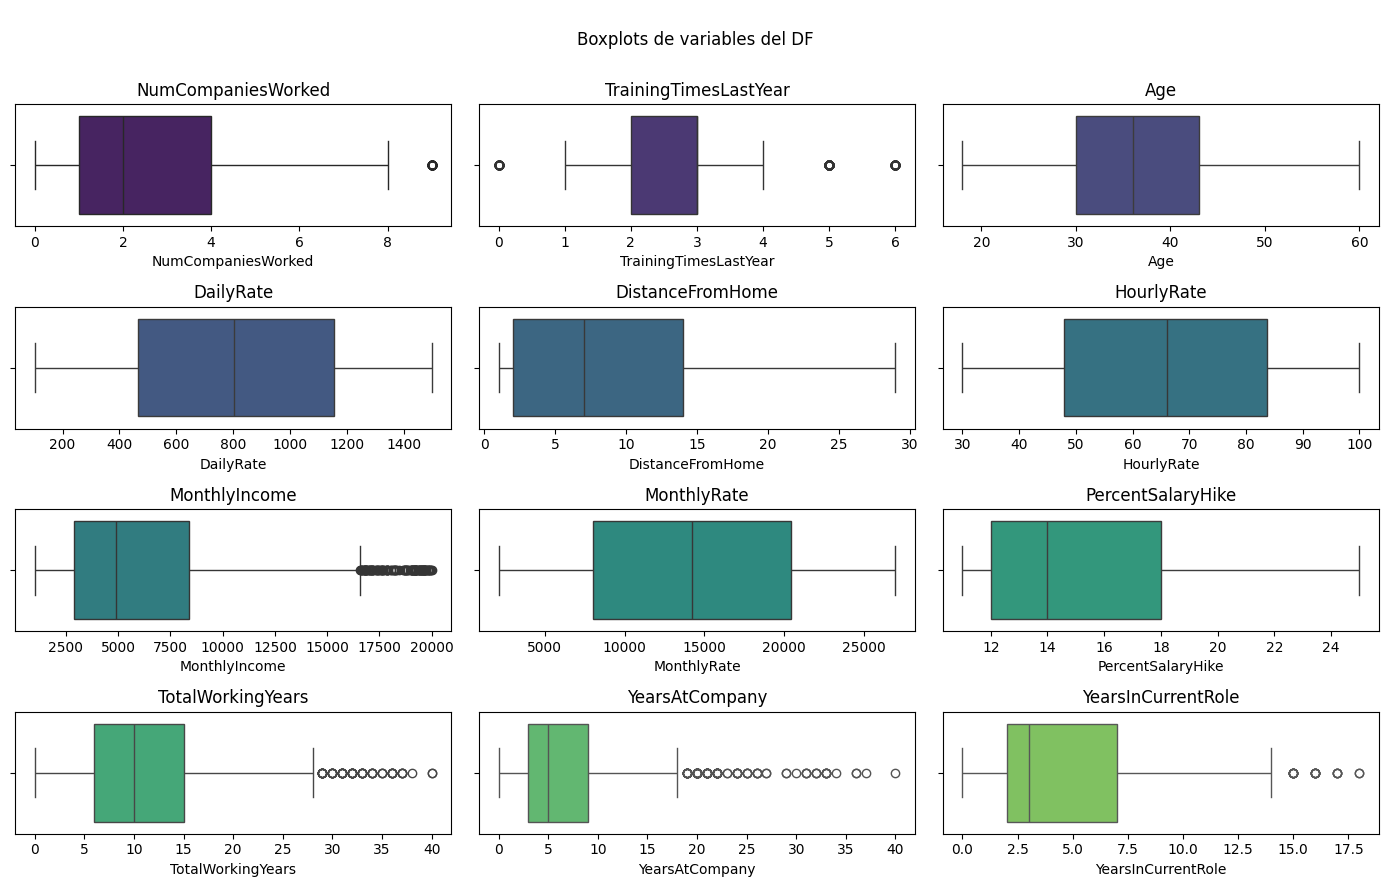

In [178]:
scale_cols = list()

# Establecimiento espacio para graficar y colores
fig, axes = plt.subplots(4,3, figsize=(14,9))
axes = axes.ravel()
colors = sns.color_palette("viridis", len(num_cols))

# Graficando histogramas por cada variable del data frame
for col, ax, color in zip(num_cols, axes, colors):

    # Realiza el histograma y coloca el título del gráfico
    ax = sns.boxplot(data=X[num_cols], x=col, ax=ax, color=color)
    ax.set_title(f'{col}')

    scale = max(X[col]) - min(X[col])
    if scale > 1:
        scale_cols.append(col)
    elif (min(X[col]) < 0 and max(X[col]) > 1):
        scale_cols.append(col)

print("Columnas a escalar (scale_cols):")
print(scale_cols)

fig.suptitle("\nBoxplots de variables del DF\n")
fig.tight_layout()

Observaciones
*   Aquí podemos observar que necesitamos escalar los valores de las variables que son mucho mayores, puesto que tendrán un efecto predominante en el modelo. Podemos aplicar standar scaler (Z - score).
*   Existe presencia de outliers significativa en algunos campos, siendo el salario, los años trabajados, años en la compañia y años en el puesto actual.
* Podemos realizar un método para quitar la presencia de los outliers como un simple imputer.


# Dibujando diagramas de barras para gráficas categóricas, ordinales y binarias

Columnas a graficar ['BusinessTravel' 'Department' 'EducationField' 'JobRole' 'MaritalStatus'
 'Gender' 'OverTime' 'Education' 'EnvironmentSatisfaction'
 'JobInvolvement' 'JobLevel' 'JobSatisfaction' 'PerformanceRating'
 'RelationshipSatisfaction' 'StockOptionLevel' 'WorkLifeBalance']
# de columnas: 16


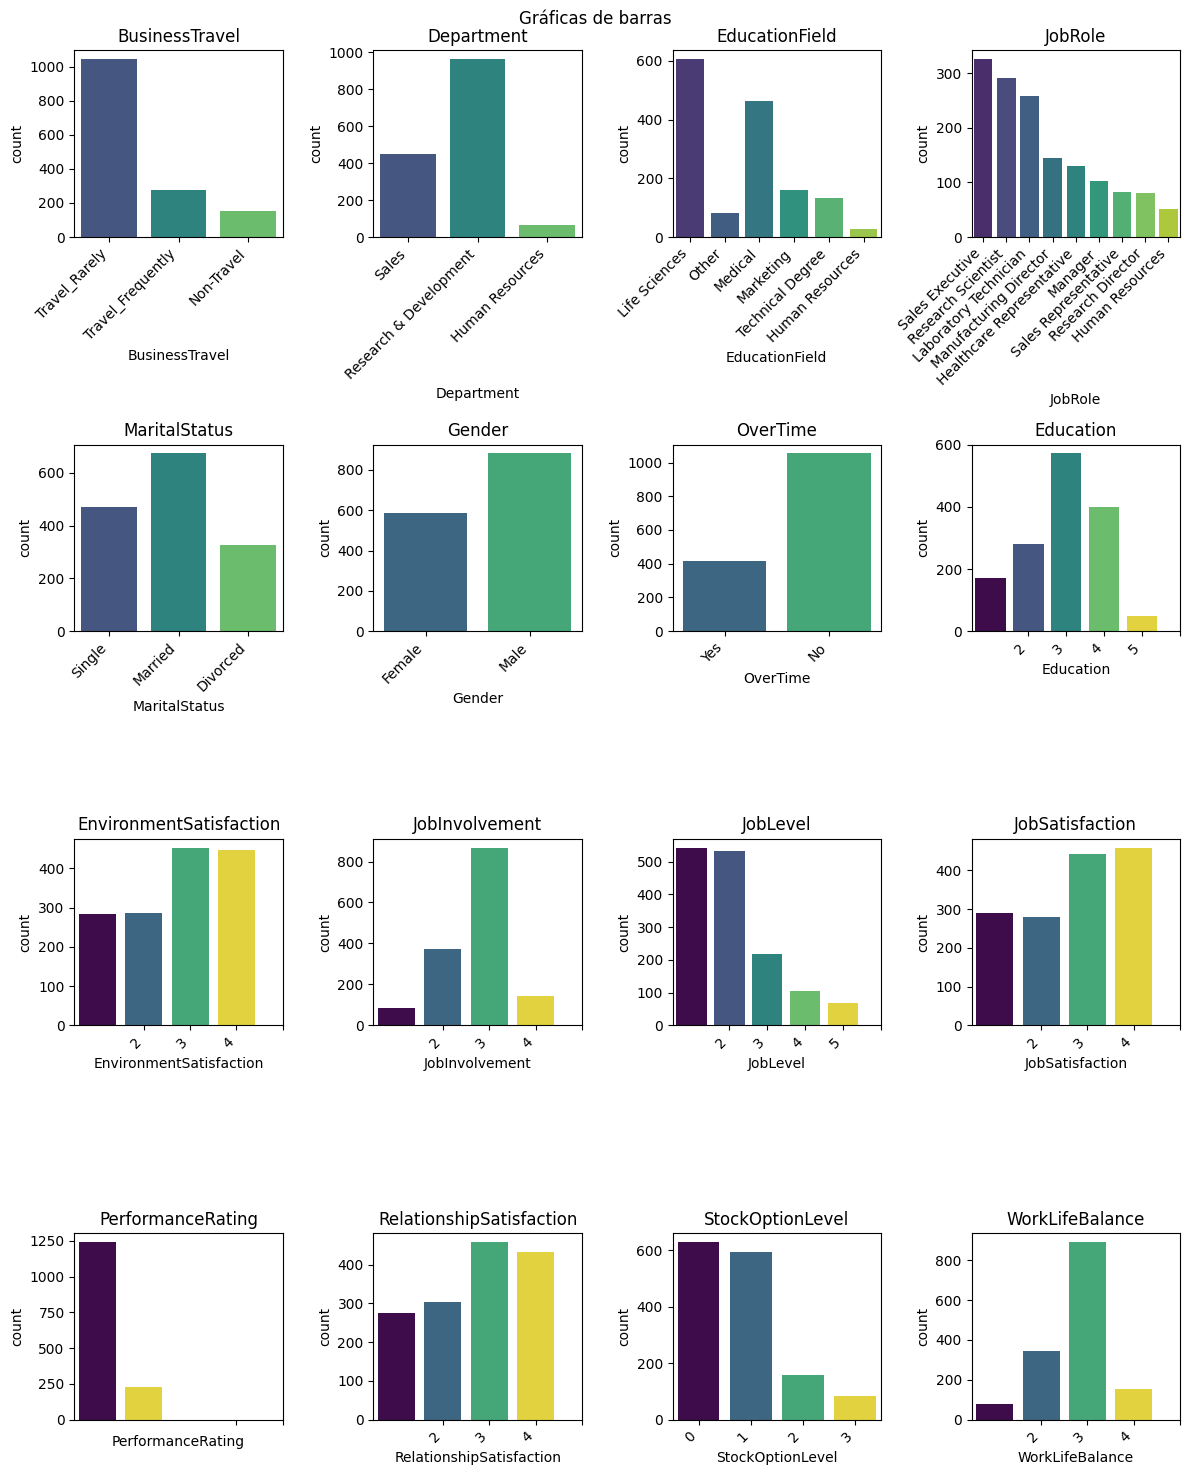

In [179]:
# Agrupando variables a graficar
X_barras = np.concatenate((cat_cols, bin_cols, ord_cols))
print("Columnas a graficar", X_barras)
print("# de columnas:", len(X_barras))

# Graficando diagramas de barras para variables categóricas

# Seaborn
fig, axes = plt.subplots(4,4, figsize=(12,15))
axes = axes.ravel()

for col, ax in zip(X_barras, axes):
    sns.countplot(data=X[X_barras], x=col, ax=ax, hue=col, palette="viridis", legend=False)
    ax.set_title(f'{col}')

    # Obtener los valores únicos de la columna 'col'
    ticks = X[col].unique()

    # Establecer los ticks en el eje x
    ax.set_xticks(ticks)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)  # Rota las etiquetas

fig.suptitle("Gráficas de barras")
fig.tight_layout()  # Ajusta el espaciado entre subplots



# **Ejercicio 8:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**



In [180]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


# NUMÉRICAS:
numericas_pipeline = Pipeline([
    ('impMediana', SimpleImputer(strategy='median')),
    ('PowerTransformer', PowerTransformer(method='yeo-johnson', standardize=True))
])
numericas_pipeline_nombres = num_cols
# Se aplicó yeo-johnson para normalizar la forma de los histogramas y una estandarización para escalar los valores y tengan un impacto similar en el modelo


# ORDINALES:
catOrd_pipeline = Pipeline(steps=[
    ('OrdinalEncoder', OrdinalEncoder())
])
catOrd_pipeline_nombres = ord_cols
#

# BINARIAS:
catBin_pipeline = Pipeline(steps=[
    ('BinaryEncoder', BinaryEncoder())
    #('PowerTransformer', PowerTransformer(method='yeo-johnson', standardize=True))
])
catBin_pipeline_nombres = bin_cols
# Se aplicó un binary encoding aunque es posible también utilizar un onehot encoding, únicamente que utilizaria un feature más. El binary es más reducido y al tener 2 elementos (Yes/No) es preferido.

# NOMINALES:
catNom_pipeline = Pipeline(steps=[
    ('OneHotCat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))
    #('PowerTransformer', PowerTransformer(method='yeo-johnson', standardize=True))
])
catNom_pipeline_nombres = cat_cols



columnasTransformer = ColumnTransformer(
    transformers=[
        ('numpipe', numericas_pipeline, numericas_pipeline_nombres),
        ('ordpipe', catOrd_pipeline, catOrd_pipeline_nombres),
        ('binpipe', catBin_pipeline, catBin_pipeline_nombres),
        ('catpipe', catNom_pipeline, catNom_pipeline_nombres)
    ],
    remainder='passthrough'
)

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 9:**

#### **Reagrupa los conjuntos de entrenamiento y validación en un solo DataFrame.**

#### **A estos nuevos DataFrame llamarlos Xtv y ytv.**

In [181]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


Xtv = pd.concat([Xtrain, Xval], axis=0)
ytv = pd.concat([ytrainT, yvalT], axis=0)


# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

print(Xtv.shape)
print(ytv.shape)

(1062, 30)
(1062, 1)


# **Ejercicio 10:**

#### **Busca los mejores hiperparámetros.**

>> LR 0.876 (0.014)
>> LASSO 0.879 (0.013)
>> RIDGE 0.881 (0.015)
>> EN 0.881 (0.014)
>> kNN 0.842 (0.008)


<ipython-input-182-9260165d191b>:73: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.


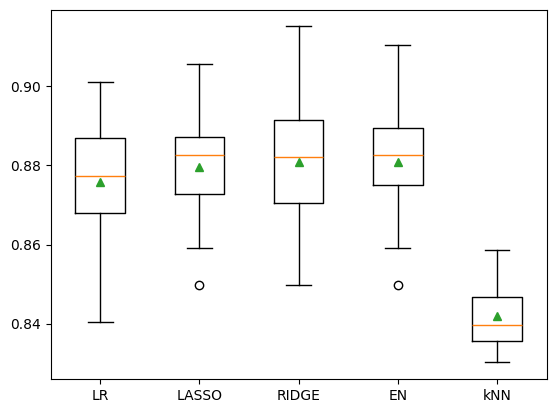

In [182]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


def mis_modelos():
  modelos, nombres = list(), list()

  # LR - Regresión Logística sin regularización:
  modelos.append(LogisticRegression(penalty=None,  # Este valor de "penalty" no se debe de cambiar, ya que define el modelo sin regularización.
                                    solver = "lbfgs",
                                    max_iter = 1000,
                                    C = 1.0, # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LR')


  # Lasso - Regresión Logística con regularización L1:
  modelos.append(LogisticRegression(penalty='l1',     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    solver = "liblinear",
                                    max_iter = 1000,
                                    C = 1.0,
                                    random_state=1))
  nombres.append('LASSO')


  # Ridge - Regresión Logística con regularización L2:
  modelos.append(LogisticRegression(penalty='l2',
                                    solver = "liblinear",
                                    max_iter = 1000,
                                    C = 1.0,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('RIDGE')


  # Elastic_Net - - Regresión Logística con regularización L1 y L2:
  modelos.append(LogisticRegression(penalty='elasticnet',
                                    l1_ratio=0.5,
                                    solver = "saga",
                                    max_iter = 2000,
                                    C = 1.0,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('EN')



  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier()) # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
  nombres.append('kNN')

  return modelos, nombres

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# Entrenamos los modelos:

modelos, nombres = mis_modelos()  # accesando los modelos.
resultados = list()    # para guardar los resultados en esta lista.

# Iterando y entrenando sobre cada modelo:
for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])   # Transformaciones y modelo en un Pipeline.

  cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)     # Aplicando una de las variantes de Validación Cruzada.

  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1)   # entrenando y generando los resultados.

  resultados.append(scores)    # guardando los resultados en la lista.
  print('>> %s %.3f (%.3f)' % (nombres[i], np.nanmean(scores), np.nanstd(scores)))  # desplegando los promedios de cada modelo.


plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.
plt.show()

# **Ejercicio 11:**

#### **Utilizando el mejor modelo y los datos Xtv, ytv, realiza una búsqueda de malla para encontrar los mejores hiperparámetros. Verifica que el modelo no esté subentrenado o sobreentrenado.**



In [183]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++


mejor_modelo = LogisticRegression(penalty='l1',
                                    l1_ratio=0.5,
                                    solver = "saga",
                                    max_iter = 2000,
                                    C = 1.0,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1)

#LogisticRegression(penalty='l1', max_iter=2000, random_state=1)

dicc_grid = {'C':[ 0.5, 1., 3.],
             'solver':['liblinear','saga']
             #"l1_ratio": [0.1, 0.5, 1],
             #"max_iter": [100, 500, 1000]
             }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)

grid = GridSearchCV(estimator=mejor_modelo,
                    param_grid=dicc_grid,
                    cv=cv,
                    scoring='accuracy',  # podemos seleccionar otras métricas: 'accuracy', 'f1', 'precision', 'recall'
                    n_jobs=-1,
                    return_train_score=True    # podemos obtener los de entrenamiento para verificar sobreentrenamiento.
                    )


Xx = columnasTransformer.fit_transform(Xtv)

grid_result = grid.fit(Xx, np.ravel(ytv))



# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++



print("Mejor modelo: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print('Promedios Train mean(std): %.4f(%.4f)' % (np.nanmean(grid_result.cv_results_['mean_train_score']),
                                                 np.nanmean(grid_result.cv_results_['std_train_score'])))
print('Promedios Val mean(std): %.4f(%.4f)' % (grid_result.cv_results_['mean_test_score'].mean(),
                                               grid_result.cv_results_['std_test_score'].mean()))


Mejor modelo: 0.880105 usando {'C': 0.5, 'solver': 'liblinear'}
Promedios Train mean(std): 0.8968(0.0037)
Promedios Val mean(std): 0.8778(0.0139)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


# **Ejercicio 12:**

#### **Con los mejores valores de hiperparámetros del mejor modelo encontrado, obtener:**

*   #### **a) Matriz de Confusión.**
*   #### **b) Análisis de Imprtancia de Factores.**
*   #### **c) Reporte de métricas.**

# A) Obteniendo Accuracy e impriminedo matriz de confusión

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Score: 0.8823529411764706


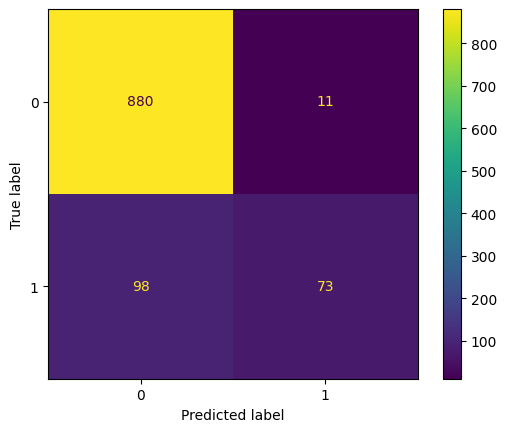

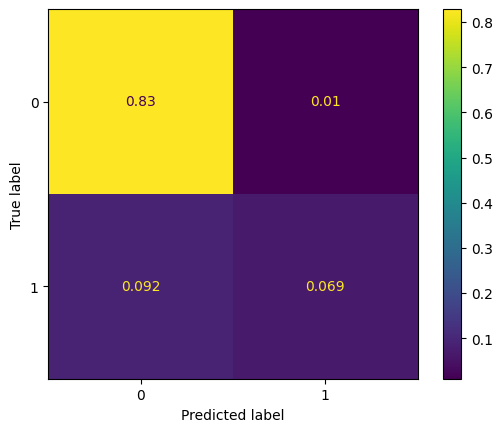

In [184]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++
# Incluye todas las celdas que consideres adecuado para responder
# estos tres incisos del ejercicio.


# Mejor modelo e hiperparámetros:
modelo_mejor = LogisticRegression(penalty='l1',
                                  l1_ratio=0.5,
                                  max_iter=2000,
                                  solver='liblinear',
                                  C=0.5,
                                  random_state=1)


Xx = columnasTransformer.fit_transform(Xtv)

mejor_result = modelo_mejor.fit(Xx, np.ravel(ytv))

resultado = mejor_result.score(columnasTransformer.transform(Xtest), le.transform(np.ravel(ytest))) # Apply le.transform here
print("Score:",resultado)


# matriz de confusión:
ConfusionMatrixDisplay.from_estimator(mejor_result, Xx, np.ravel(ytv))
plt.show()


ConfusionMatrixDisplay.from_estimator(mejor_result, Xx, np.ravel(ytv), normalize='all')
plt.show()

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

# B) Análisis de importancia de factores

In [185]:

# Análisis de importancia de fcatories btenerlo con los nombres de los factores:
factores = pd.DataFrame(data = mejor_result.coef_.reshape(-1,1),
             index = columnasTransformer.get_feature_names_out())
factores.columns = ["importancia"]
display(factores)


,importancia
numpipe__NumCompaniesWorked,0.435233
numpipe__TrainingTimesLastYear,-0.227717
numpipe__Age,-0.239923
numpipe__DailyRate,-0.048672
numpipe__DistanceFromHome,0.319964
numpipe__HourlyRate,0.057019
numpipe__MonthlyIncome,-0.529931
numpipe__MonthlyRate,0.097017
numpipe__PercentSalaryHike,-0.031040
numpipe__TotalWorkingYears,-0.140965


# Factores mas influyentes

In [186]:
factores_mas_influyentes = factores[factores["importancia"] > 0.5]
display(factores_mas_influyentes)

,importancia
binpipe__OverTime_0,1.375596
catpipe__BusinessTravel_Travel_Frequently,1.119266
catpipe__EducationField_Technical Degree,0.571356
catpipe__MaritalStatus_Single,0.939620


# C) Reporte de Métricas

In [189]:
Xx = columnasTransformer.fit_transform(Xtv)
mejor_modelo.fit(Xx, np.ravel(ytv))

# Realizando predicción
ypredtv = mejor_modelo.predict(Xx)

# Generando reporte
reporte = classification_report(ytv, ypredtv)
print("Reporte de Métricas",reporte)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Reporte de Métricas               precision    recall  f1-score   support

           0       0.90      0.98      0.94       891
           1       0.83      0.44      0.57       171

    accuracy                           0.90      1062
   macro avg       0.87      0.71      0.76      1062
weighted avg       0.89      0.90      0.88      1062



# **Ejercicio 13**

#### **Obtener el desempeño final del modelo (accuracy) con el conjunto de prueba (test).**

In [188]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

XtestT = columnasTransformer.transform(Xtest)

ypred = mejor_result.predict(XtestT) # Predict on the transformed Xtest
accuracy = accuracy_score(ytestT, ypred) # Compare with the transformed ytestT
print("Accuracy:", accuracy)

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

Accuracy: 0.8823529411764706


# **Ejercicio 14**

#### **Incluye tus conclusiones finales de la actividad.**

#### +++++++++ Inicia sección para incluir tus conclusiones ++++++++++++++++++++++++

Conforme a los resultados, pudimos determinar que los factores que más influyen en la decision de rotación de personal son los siguientes:

| Factor  | Valor  |   |   |   |
|---|---|---|---|---|
| OverTime  |  1.375596 |
|  BusinessTravel_Travel_Frequently | 1.119266  |
|  Field_Technical Degree |  0.571356 |  
|  MaritalStatus_Single |  0.939620 |

Se tiene un accuracy del 88% con nuestro modelo l1 (LASSO) cuyos hiperparámetros más efectivos fueron: 'C': 0.5, 'solver': 'liblinear'

#### +++++++++ Termina sección para incluir tus conclusiones ++++++++++++++++++++++++

# >> **Fin de la Actividad de la Semana 3** <<